In [77]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency
import scipy
scipy.__version__

'1.10.1'

In [76]:
# LOADING DATA
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q1. Do smokers have higher insurance charges than non-smokers?
1. State your Null Hypothesis and Alternative Hypothesis
    - Null Hypothesis -  There is no significant difference in insurance charges between smokers and non-smokers.
    - Alternative Hypothesis - Smokers have significantly higher insurance charges than non-smokers.
2. Select the correct test according to the data type and number of samples
    - We will use t-Test to compare and two samples
3. Test the assumptions of your selected test.
    - Normality Check, Check Outliers and Varience check.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

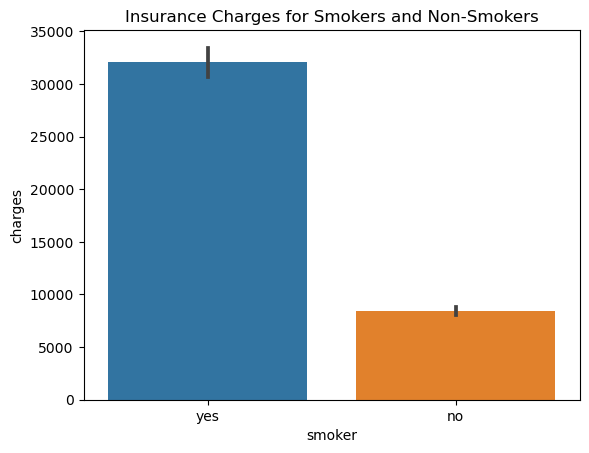

In [48]:
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges for Smokers and Non-Smokers')
plt.show()

In [49]:
# creating a subset for smokers charges and non somkers charges
smokers_charges = df.loc[df['smoker'] == 'yes']['charges'].copy()
non_smokers_charges = df.loc[df['smoker'] == 'no']['charges'].copy()

In [50]:
# mean charges for each group
mean_smokers = smokers_charges.mean()
mean_non_smokers = non_smokers_charges.mean()

# Print the results
print(f"Mean charges for smokers: {mean_smokers}")
print(f"Mean charges for non-smokers: {mean_non_smokers}")

Mean charges for smokers: 32050.23183153284
Mean charges for non-smokers: 8434.268297856204


In [51]:
# Descriptive statistics
mean_smokers = smokers_charges.mean()
mean_non_smokers = non_smokers_charges.mean()

# Print the results
print(f"Mean charges for smokers: {mean_smokers}")
print(f"Mean charges for non-smokers: {mean_non_smokers}")

Mean charges for smokers: 32050.23183153284
Mean charges for non-smokers: 8434.268297856204


In [52]:
smokers_charges.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [53]:
non_smokers_charges.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [62]:
# testing outliers in smokers_charges
zscores_smokers = stats.zscore(smokers_charges)
outliers_sm = abs(zscores_f)>3
#np.sum(outliers_sm)

print(f"There are {np.sum(outliers_sm)} outliers.")

There are 0 outliers.


In [55]:
# testing outliers non_smokers_charges
zscores_nsmokers = stats.zscore(non_smokers_charges)
outliers_ns = abs(zscores_nsmokers)>3
#np.sum(outliers_ns)

print(f"There are {np.sum(outliers_ns)} outliers.")

There are 24 outliers.


In [56]:
# removing outliers in non_smokers_charges
non_smokers_charges = non_smokers_charges[(np.abs(stats.zscore(non_smokers_charges)) < 3)]


In [64]:
# Test for Normality
result = stats.normaltest(smokers_charges)
print(result)

result = stats.normaltest(non_smokers_charges)
print(result)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


pvalues for both groups is less than 0.05

In [65]:
# Test for equal variance
result = stats.levene(smokers_charges, non_smokers_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [68]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

5. Interpret your p-value and reject or fail to reject your null hypothesis
    - pvalue is less than 0.05
    - reject the null value, there's a difference in charges for both smoker and non smokers

6. Show a supporting visualization that helps display the result

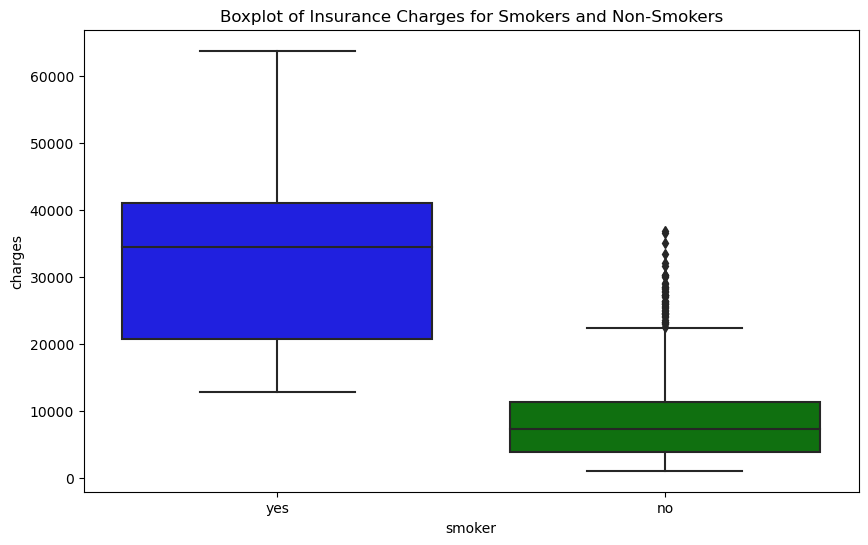

In [75]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette=['blue', 'green'])
plt.title('Boxplot of Insurance Charges for Smokers and Non-Smokers')
plt.show()

Smokers have a higher number of charges compared to non smokers

In [ ]:
Q1. Do smokers have higher insurance charges than non-smokers?
1. State your Null Hypothesis and Alternative Hypothesis
    - Null Hypothesis (H0): Men and women are equally likely to smoke; there is no noticeable difference in the proportion of smokers between the two genders.
    - Alternative Hypothesis (H1): Men and women are not equally likely to smoke; there is a noticeable difference in the proportion of smokers between the two genders.
2. Select the correct test according to the data type and number of samples
    - We will use Chi-Square testing to test
    - Categorical Variables
3. Test the assumptions of your selected test.

In [83]:
# calculate the contingency table with pd.cross-tab
chi_table = pd.crosstab(df['sex'], df['smoker'])
chi_table

smoker,no,yes
sex,,
female,547,115
male,517,159


4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [84]:
# Run the Test and Save the Output
chi_table = stats.chi2_contingency(chi_table)
chi2, p, deg_free, expected_vals = chi_table #this labels the chi_table

In [85]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

In [ ]:
5. Interpret your p-value and reject or fail to reject your null hypothesis
    - p-value is less than 0.05, we will reject our null hypothesis.

6. Show a supporting visualization that helps display the result

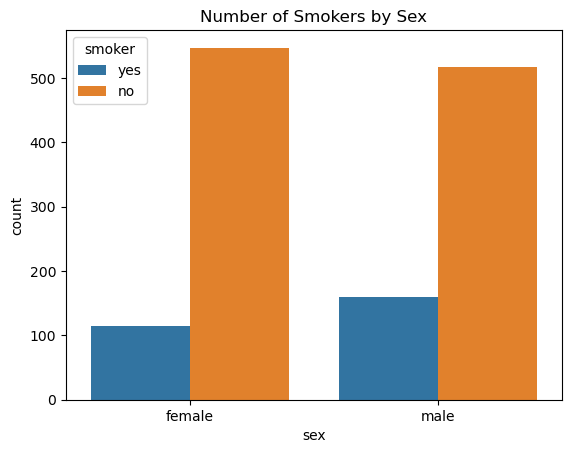

In [87]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

Males are highly likely to be smokers.
Females are less likely to be smokers.

In [ ]:
Q3. Do different regions have different charges, on average?
1. State your Null Hypothesis and Alternative Hypothesis
    - Null Hypothesis (H0): There is no significant difference in insurance charges across different regions, the average charges are the same for all regions.
    - There is a significant difference in insurance charges across different regions; the average charges vary among regions.
2. Select the correct test according to the data type and number of samples
    - We will use ANOVA to compare a continuous variable across more than two groups
3. Test the assumptions of your selected test.

In [89]:
# test for outliers
zscores = np.abs(stats.zscore(df['charges']))
df = df[zscores < 3]
zscores

0       0.329043
1       0.967187
2       0.734274
3       0.765090
4       0.784091
          ...   
1333    0.208314
1334    0.926108
1335    0.975372
1336    0.943041
1337    1.377053
Name: charges, Length: 1331, dtype: float64

In [90]:
# test for normality

## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [91]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,321.0,1.957084e-22,99.970833
southeast,357.0,1.023992e-13,59.819794
northwest,323.0,9.182483e-21,92.273979
northeast,321.0,1.824004e-17,77.085825


In [92]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,321.0,1.957084e-22,99.970833,True
southeast,357.0,1.023992e-13,59.819794,True
northwest,323.0,9.182483e-21,92.273979,True
northeast,321.0,1.824004e-17,77.085825,True


In [93]:
# with the * operator 
#Checking for Equal Variance
stats.levene(*groups.values())

LeveneResult(statistic=4.765422999767639, pvalue=0.0026147448169723925)

The pvalues in these groups are less than 0.05, we are rejecting the null hypothesis.
The charges are not the same accross the regions

In [ ]:
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
There is no equal varience 

In [94]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.7638872422175975, pvalue=0.1899257157085212)

In [ ]:
5. Interpret your p-value and reject or fail to reject your null hypothesis 
    - The resuls from kruskal-Wallis test have a value that is greater than 0.05
    - We wont reject the null hypothesis
    - Therefore, there is no significant difference in insurance charges across different regions, the average charges are the same for all regions.

In [ ]:
6. Show a supporting visualization that helps display the result


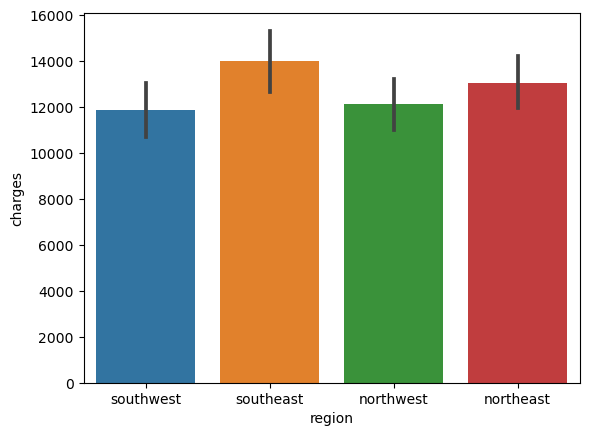

In [95]:
sns.barplot(data=df, x='region',y='charges');